In [2]:
!pip3 install drawdata

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ------------------- -------------------- 1.0/2.2 MB 5.8 MB/s eta 0:00:01
   ------------------- -------------------- 1.0/2.2 MB 5.8 MB/s eta 0:00:01
   ------------------- -------------------- 1.0/2.2 MB 5.8 MB/s eta 0:00:01
   ----------------------- ---------------- 1.3/2.2 MB 1.4 MB/s eta 0:00:01
   --------------------------------- ------ 1.8/2.2 MB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 1.8 MB/s eta 0:00:00

   ------ --------------------------------- 1/6 [psygnal]
   ------ --------------------------------- 1/6 [psygnal]
   ------ --------------------------------- 1/6 [psygnal]
   ------ --------------------------------- 1/6 [psygnal]
   ------------- -------------------------- 2/6 [jupyterlab_widgets]
   -------------------- ------------------- 3/6 [ipywidgets]
   -------------------- ----------


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import DecisionBoundaryDisplay


from drawdata import ScatterWidget
#https://github.com/koaning/drawdata

In [13]:
widget = ScatterWidget()

In [27]:
widget

ScatterWidget(brushsize=49, data=[{'x': 46.891034452135955, 'y': 401.668692501051, 'color': '#1f77b4', 'label'…

In [28]:
df = widget.data_as_pandas
df.head()

,x,y,color,label,batch
0,46.891034,401.668693,#1f77b4,a,0
1,40.947108,418.931466,#1f77b4,a,0
2,99.740774,421.699851,#1f77b4,a,0
3,90.906458,442.710760,#1f77b4,a,0
4,123.262859,391.423817,#1f77b4,a,0


In [29]:
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])
df.head()

,x,y,color,label,batch,label_encoded
0,46.891034,401.668693,#1f77b4,a,0,0
1,40.947108,418.931466,#1f77b4,a,0,0
2,99.740774,421.699851,#1f77b4,a,0,0
3,90.906458,442.710760,#1f77b4,a,0,0
4,123.262859,391.423817,#1f77b4,a,0,0


In [30]:
X = df[['x', 'y']].values
y = df['label_encoded'].values

classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_jobs = -1),
    'Linear SVC': LinearSVC(),
    'Support Vector Classifier': SVC(kernel='rbf'),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

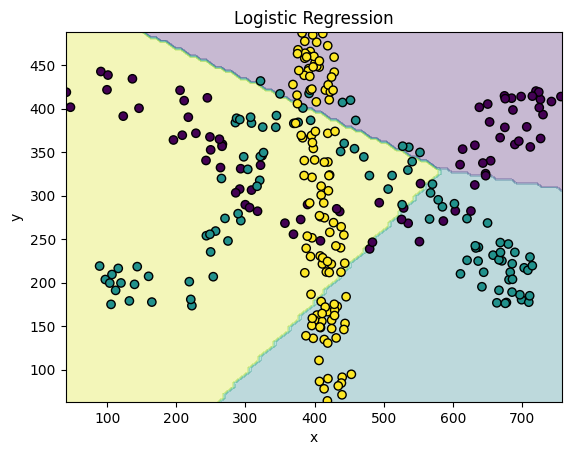

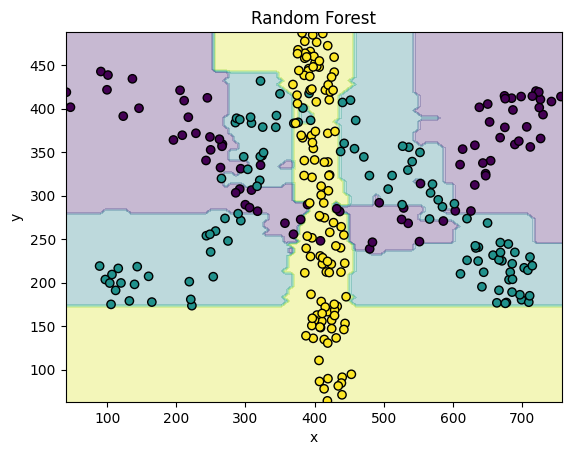

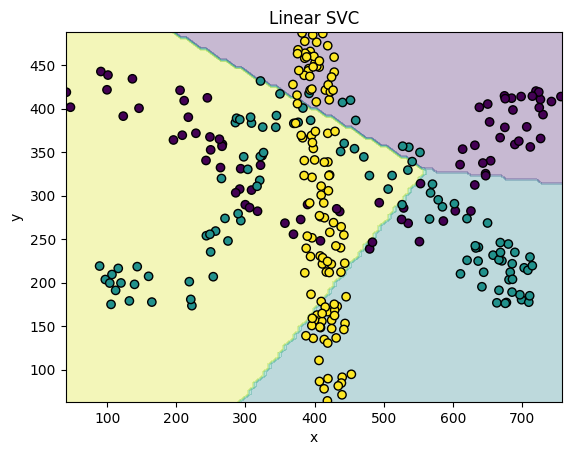

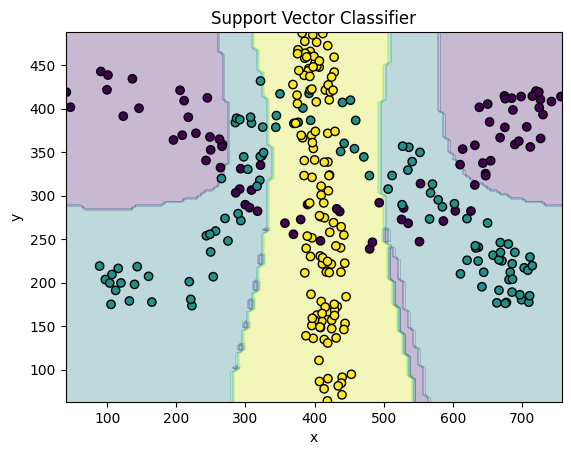

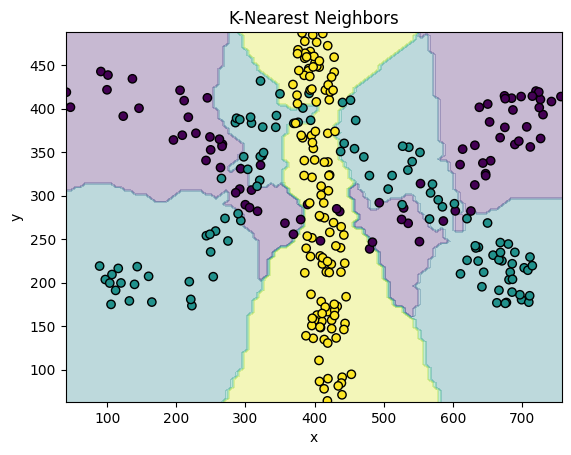

In [31]:
for name, clf in classifiers.items():
    clf.fit(X,y)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method='predict',
        xlabel='x',
        ylabel='y',
            alpha=0.3
    )

    disp.ax_.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        edgecolor='k'
    )

    disp.ax_.set_title(name)
    plt.show()
    

In [32]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

import ipywidgets
from IPython.display import HTML

In [ ]:
widget3 = ScatterWidget()
output = ipywidgets.Output()

classifier_selector = ipywidgets.RadioButtons(
    options = ['Logistic Regression', 'Random Forest', 'SVC Poly', 'SVC RBF'],
    description = 'Classifier:',
)

In [50]:
@output.capture(clear_output=True)
def on_change(change):
    df = widget3.data_as_pandas
    if len(df) and (df['color'].nunique() > 1):
        X = df[['x', 'y']].values
        y = df['color']
        display(HTML("<br><br><br>"))
        fig = plt.figure(figsize=(12, 12))

        if classifier_selector.value == 'Logistic Regression':
            classifier = LogisticRegression().fit(X, y)
        elif classifier_selector.value == 'SVC Poly':
            classifier = SVC(kernel='poly').fit(X, y)
        elif classifier_selector.value == 'SVC RBF':
            classifier = SVC(kernel='rbf').fit(X, y)
        else:
            classifier = RandomForestClassifier().fit(X, y)

        disp = DecisionBoundaryDisplay.from_estimator(
            classifier, 
            X,
            response_method="predict",
            xlabel="x", ylabel="y",
            alpha=0.5,
        )
        disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
        plt.title(f"{classifier.__class__.__name__}")
        plt.show()

In [51]:
widget3.observe(on_change, names='data')
classifier_selector.observe(on_change, names='value')
on_change(None)

ipywidgets.HBox([ipywidgets.VBox([widget3, classifier_selector]), output])